# Caso de uso 1 - Clasificación binaria 

### Introducción al caso de uso

En este primer caso de uso veremos como a partir de un conjunto de datos podemos aplicar un problema de clasificación binaria. La pregunta que nos hemos planteado es la siguiente: **¿Podemos predecir si una venta será sea exitosa o no?**

#### Variable respuesta

Trataremos con un problema de clasificación binária dónde la variable respuesta será: **Status**. Ésta toma valores categóricos: (Sold,Returned) en función de si una venta es exitosa (Sold), o no (Returned)

#### Descripción del conjunto de datos

Los conjunto de datos se componen por:

* Datos numéricos (floats/enteros)
* Datos categóricos (object)

#### Problemas específicos de los datos

Los distintos conjuntos de datos tienen algunos problemas que hemos de tratar antes de aplicar cualquier modelo de ML. EN primer lugar, consideraremos:

* Modificaremos las variables categóricas que sean el **Precio** de todos los conjuntos de datos. Estas las convertiremos a numéricas y pasaremos de, p.ej: ($10) a 10 para indicar un coste de 10 dólares, pero sin el símbolo del dólar.
* Modificar varible de **Género**: Hombre será indicado por 0, Mujer por 1.
* Modificar varible de **Tipo**: Internal será indicado por 0, External por 1.
* Trataremos la fecha para coger su año, mes y dia
* Haremos otras modificaciones con las variables categóricas para convertir sus categorias en etiquetas numéricas

Más adelante convertiremos las variables categóricas a numéricas, esto lo hacemos para:

* **Compatibilidad con Modelos Estadísticos y de ML**: Muchos algoritmos de ML, como regresiones, árboles de decisión, entre otros, requieren que las variables sean numéricas. Estos modelos no pueden procesar directamente las variables categóricas porque operan matemáticamente con números.

* **Mejora en el Rendimiento del Modelo**: En algunos casos, la transformación de variables categóricas en numéricas puede mejorar la precisión y el rendimiento de los modelos. Por ejemplo, en la codificación one-hot, se crean variables binarias que indican la presencia o ausencia de cada categoría, lo que puede ayudar al modelo a capturar mejor las relaciones en los datos.

* **Facilitar el Análisis Estadístico**: En análisis estadístico, muchas pruebas y procedimientos requieren datos numéricos para calcular estadísticas como medias, varianzas, y otros. Convertir las variables categóricas a numéricas permite realizar estos análisis..

## Importación de paquetes e importación

In [160]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 2.3 MB/s eta 0:00:0000:0100:01


In [111]:
!pip install pandas
!pip install openpyxl
!pip install scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [112]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [113]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


## Librerías necesarias

In [293]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib import rcParams

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="findfont: Generic family")

rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.family'] = 'serif'


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before.")

## Exploración previa de los datos

#### Ruta actual

Cuando quereamos importar un fichero y luego leerlo es importante saber si estamos en la ruta correcta para tener visibilidad sobre el mismo y poder cargarlo. 

Podemos crear una celda y usar el comando para poder ver la ruta en la que se encuentra el notebook. A partir de saber la ruta del notebook podremos especificar la ruta relativa hacia el archivo o sino también especificar la absoluta mediante el path que podemos obtener cuando hagamos click derecho sobre el archivo de datos.

Antes de empezar a trabajar con los datos es una buena práctica explorarlos y analizarlos para saber que variables hemos de preprocesar, si hay valores faltantes o variables que hemos de codificar correctamente antes de aplicar los modelos de ML. 
```{python}
!pwd
```

In [218]:
!pwd

/home/marta/formacion-allianz


### Importación de los datos

El conjunto de datos con el que trabajaremos está en formato **Excel (.xslx)** y se compone por varias tablas definidas en distintas hojas del Excel. 

Importaremos los datos desde una hoja de Excel a un DataFrame de Pandas.

In [219]:
datosAllianz = pd.ExcelFile('datosVentasAllianz.xlsx')
datosAllianz.sheet_names #vemos las hojas que tiene

['Ventas',
 'Tiendas',
 'Productos',
 'Incidencias y promociones',
 'Clientes',
 'Ciudades']

In [220]:
dfUnificadoVentas = pd.read_excel(datosAllianz, 'Ventas')
dfUnificadoTiendas = pd.read_excel(datosAllianz, 'Tiendas')
dfUnificadoProductos = pd.read_excel(datosAllianz, 'Productos')
dfUnificadoIncidenciasPromos = pd.read_excel(datosAllianz, 'Incidencias y promociones')
dfUnificadoClientes = pd.read_excel(datosAllianz, 'Clientes')
dfUnificadoCiudades = pd.read_excel(datosAllianz, 'Ciudades')

### Anàlisis i exploración de los distintos conjuntos de datos con los que tratamos

In [221]:
dfUnificadoVentas.head()

,Venta ID,ProductoID,TiendaID,Status,Unidad,Precio,Cliente ID,Fecha
0,3.651007e+10,12.0,5.0,Sold,1.0,$40,2.300012e+14,2021-05-12
1,3.526179e+10,12.0,5.0,Sold,1.0,$40,2.300040e+14,2022-01-27
2,2.380638e+10,12.0,5.0,Sold,1.0,$40,2.300045e+14,2021-07-15
3,3.335946e+11,12.0,5.0,Sold,1.0,$40,2.300053e+14,2021-07-03
4,3.602100e+11,12.0,5.0,Sold,1.0,$40,2.300053e+14,2021-05-14


In [222]:
dfUnificadoVentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044513 entries, 0 to 1044512
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Venta ID    29875 non-null    float64       
 1   ProductoID  29875 non-null    float64       
 2   TiendaID    29875 non-null    float64       
 3   Status      29875 non-null    object        
 4   Unidad      29875 non-null    float64       
 5   Precio      29875 non-null    object        
 6   Cliente ID  29875 non-null    float64       
 7   Fecha       1044513 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 63.8+ MB


In [223]:
dfUnificadoProductos.head()

,Producto,ID,Categoria,CategoriaID,Segmento,SegmentoID,Precio
0,Access,1,Office 365,1,Red,7,$50
1,Excel,2,Office 365,1,Jade,4,$50
2,Exchange,3,Office 365,1,Cyan,1,$50
3,OneNote,4,Office 365,1,Magenta,8,$98
4,Outlook,5,Office 365,1,Cyan,1,$48


In [224]:
dfUnificadoProductos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Producto     24 non-null     object
 1   ID           24 non-null     int64 
 2   Categoria    24 non-null     object
 3   CategoriaID  24 non-null     int64 
 4   Segmento     24 non-null     object
 5   SegmentoID   24 non-null     int64 
 6   Precio       24 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.4+ KB


In [225]:
dfUnificadoTiendas.head()

,ID,Nombre,Tipo,ID Ciudad
0,1,Abbas,External,1
1,2,Aliqui,External,2
2,3,Barba,External,4
3,4,Salvus,External,1
4,5,Fama,Internal,6


In [226]:
dfUnificadoIncidenciasPromos.head()

,Ventas ID,Incidencias,Promociones
0,5885927921,NaN,NaN
1,3098973982,NaN,NaN
2,5029132964,NaN,NaN
3,5326135078,NaN,NaN
4,5701775629,NaN,NaN


In [227]:
dfUnificadoClientes.head()

,Cliente ID,Genero,Edad
0,230001248226788,Hombre,33
1,230004031129738,Hombre,37
2,230004474223731,Mujer,24
3,230005286127327,Mujer,40
4,230005330929691,Hombre,34


In [228]:
dfUnificadoCiudades.head()

,ID Ciudad,Ciudad,C.A.,País
0,1,Barcelona,Cataluña,España
1,2,Madrid,Madrid,España
2,3,Málaga,Andalucía,España
3,4,Sevilla,Andalucía,España
4,5,Tarragona,Cataluña,España


### Agrupación de las características (features) de los distintos Datasets para poder formar el conjunto de datos que trataremos

#### Join: Ventas y Tiendas

In [229]:
dfUnificadoVentasTiendas = dfUnificadoVentas.merge(dfUnificadoTiendas, left_on='TiendaID', right_on='ID', suffixes=('', '_Tienda'))

#### Join: VentasTiendas y Productos

In [230]:
dfUnificadoVentasTiendasProductos = dfUnificadoVentasTiendas.merge(dfUnificadoProductos, left_on='ProductoID', right_on='ID', suffixes=('', '_Producto'))

#### Join: VentasTiendasProductos y Clientes

In [231]:
dfUnificadoVentasTiendasProductosClientes = dfUnificadoVentasTiendasProductos.merge(dfUnificadoClientes, left_on='Cliente ID', right_on='Cliente ID')

#### Join: VentasTiendasProductosClientes y Ciudades

In [232]:
dfUnificado = dfUnificadoVentasTiendasProductosClientes.merge(dfUnificadoCiudades, left_on='ID Ciudad', right_on='ID Ciudad', suffixes=('', '_Ciudad'))

### Breve estadística descriptiva sobre el conjunto de datos

Como tratamos con un dataset que no tiene una extensión muy grande, podemos intentar ver la estadístca descriptiva de todas las variables así que podemos dar un primer vistazo a los datos.

In [233]:
dfUnificado.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Venta ID,29875.0,NaN,NaN,NaN,140107858454435.359375,1515142996.0,7467661604373.0,180583110815046.0,230562518076501.0,279993863829064.0,102762135697256.703125
ProductoID,29875.0,NaN,NaN,NaN,13.019883,1.0,8.0,14.0,19.0,24.0,6.497625
TiendaID,29875.0,NaN,NaN,NaN,7.205556,1.0,4.0,7.0,11.0,14.0,4.12491
Status,29875,2,Sold,21827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unidad,29875.0,NaN,NaN,NaN,1.161372,1.0,1.0,1.0,1.0,3.0,0.487269
Precio,29875,47,$40,4733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente ID,29875.0,NaN,NaN,NaN,251173342358222.6875,230001248226788.0,237492802424251.0,249577857926098.0,263757366672700.5,279993863829064.0,14907805998397.3125
Fecha,29875,NaN,NaN,NaN,2022-01-29 19:52:06.185774080,2021-01-01 00:00:00,2021-07-19 00:00:00,2022-01-30 00:00:00,2022-08-13 12:00:00,2023-02-27 00:00:00,NaN
ID,29875.0,NaN,NaN,NaN,7.205556,1.0,4.0,7.0,11.0,14.0,4.12491
Nombre,29875,13,Contoso,3630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
dfUnificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29875 entries, 0 to 29874
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Venta ID         29875 non-null  float64       
 1   ProductoID       29875 non-null  float64       
 2   TiendaID         29875 non-null  float64       
 3   Status           29875 non-null  object        
 4   Unidad           29875 non-null  float64       
 5   Precio           29875 non-null  object        
 6   Cliente ID       29875 non-null  float64       
 7   Fecha            29875 non-null  datetime64[ns]
 8   ID               29875 non-null  int64         
 9   Nombre           29875 non-null  object        
 10  Tipo             29875 non-null  object        
 11  ID Ciudad        29875 non-null  int64         
 12  Producto         29875 non-null  object        
 13  ID_Producto      29875 non-null  int64         
 14  Categoria        29875 non-null  objec

In [235]:
dfUnificado['Status'].value_counts()

Status
Sold        21827
Returned     8048
Name: count, dtype: int64

In [236]:
dfUnificado['Precio'] = dfUnificado['Precio'].replace('[\$,]', '', regex=True).astype(float)
dfUnificado['Precio_Producto'] = dfUnificado['Precio_Producto'].replace('[\$,]', '', regex=True).astype(float)
dfUnificado['Genero'] = dfUnificado['Genero'].map({'Hombre': 0, 'Mujer': 1})
dfUnificado['Tipo'] = dfUnificado['Tipo'].map({'Internal': 0, 'External': 1})
dfUnificado['Status'] = dfUnificado['Status'].map({'Returned': 0, 'Sold': 1})

dfUnificado.head()

,Venta ID,ProductoID,TiendaID,Status,Unidad,Precio,Cliente ID,Fecha,ID,Nombre,...,Categoria,CategoriaID,Segmento,SegmentoID,Precio_Producto,Genero,Edad,Ciudad,C.A.,País
0,3.651007e+10,12.0,5.0,1,1.0,40.0,2.300012e+14,2021-05-12,5,Fama,...,XBOX,3,Green,4,40.0,0,33,Valencia,Comunidad Valenciana,España
1,3.526179e+10,12.0,5.0,1,1.0,40.0,2.300040e+14,2022-01-27,5,Fama,...,XBOX,3,Green,4,40.0,0,37,Valencia,Comunidad Valenciana,España
2,2.380638e+10,12.0,5.0,1,1.0,40.0,2.300045e+14,2021-07-15,5,Fama,...,XBOX,3,Green,4,40.0,1,24,Valencia,Comunidad Valenciana,España
3,3.335946e+11,12.0,5.0,1,1.0,40.0,2.300053e+14,2021-07-03,5,Fama,...,XBOX,3,Green,4,40.0,1,40,Valencia,Comunidad Valenciana,España
4,3.602100e+11,12.0,5.0,1,1.0,40.0,2.300053e+14,2021-05-14,5,Fama,...,XBOX,3,Green,4,40.0,0,34,Valencia,Comunidad Valenciana,España


In [237]:
columnas = list(dfUnificado.columns)
columnas.remove('Status')
columnas.insert(0, 'Status')
dfUnificado = dfUnificado.reindex(columns=columnas)

dfUnificado

,Status,Venta ID,ProductoID,TiendaID,Unidad,Precio,Cliente ID,Fecha,ID,Nombre,...,Categoria,CategoriaID,Segmento,SegmentoID,Precio_Producto,Genero,Edad,Ciudad,C.A.,País
0,1,3.651007e+10,12.0,5.0,1.0,40.0,2.300012e+14,2021-05-12,5,Fama,...,XBOX,3,Green,4,40.0,0,33,Valencia,Comunidad Valenciana,España
1,1,3.526179e+10,12.0,5.0,1.0,40.0,2.300040e+14,2022-01-27,5,Fama,...,XBOX,3,Green,4,40.0,0,37,Valencia,Comunidad Valenciana,España
2,1,2.380638e+10,12.0,5.0,1.0,40.0,2.300045e+14,2021-07-15,5,Fama,...,XBOX,3,Green,4,40.0,1,24,Valencia,Comunidad Valenciana,España
3,1,3.335946e+11,12.0,5.0,1.0,40.0,2.300053e+14,2021-07-03,5,Fama,...,XBOX,3,Green,4,40.0,1,40,Valencia,Comunidad Valenciana,España
4,1,3.602100e+11,12.0,5.0,1.0,40.0,2.300053e+14,2021-05-14,5,Fama,...,XBOX,3,Green,4,40.0,0,34,Valencia,Comunidad Valenciana,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,1,2.735679e+14,12.0,4.0,2.0,80.0,2.597147e+14,2022-12-09,4,Salvus,...,XBOX,3,Green,4,40.0,0,26,Barcelona,Cataluña,España
29871,1,2.732290e+14,12.0,13.0,2.0,80.0,2.597154e+14,2022-07-15,13,Contoso,...,XBOX,3,Green,4,40.0,1,39,Valencia,Comunidad Valenciana,España
29872,1,2.796445e+14,12.0,2.0,2.0,80.0,2.597207e+14,2022-07-01,2,Aliqui,...,XBOX,3,Green,4,40.0,1,23,Madrid,Madrid,España
29873,1,2.702894e+14,12.0,10.0,2.0,80.0,2.597253e+14,2021-12-28,10,Pirum,...,XBOX,3,Green,4,40.0,0,31,Valencia,Comunidad Valenciana,España


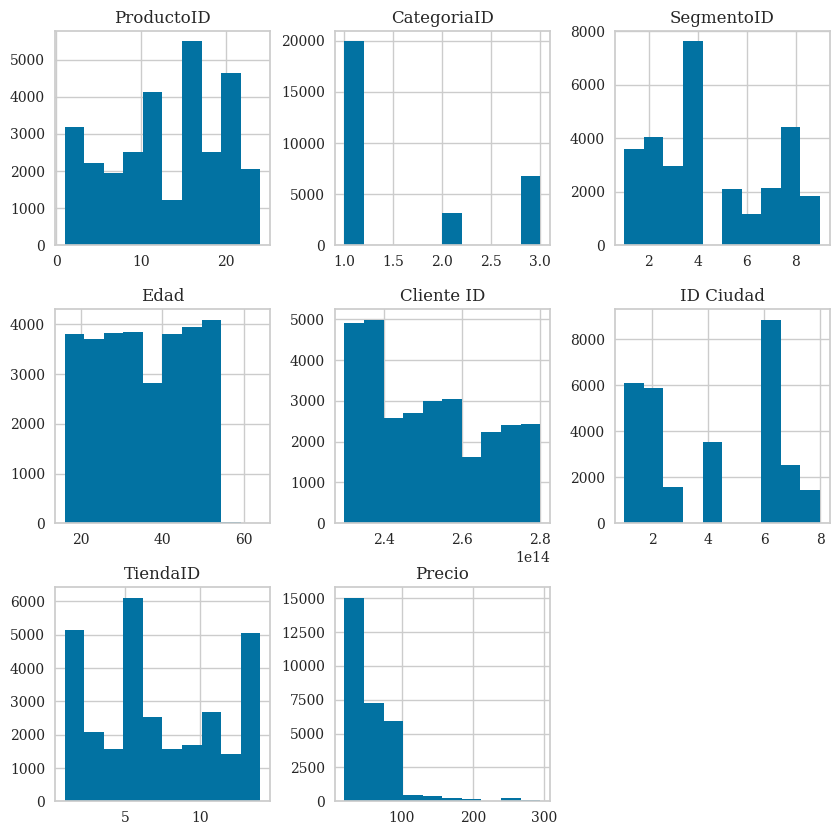

In [238]:
fig, ax = plt.subplots(figsize=(10,10))
dfUnificado.loc[:,['ProductoID', 'CategoriaID', 'SegmentoID', 'Edad', 'Cliente ID', 'ID Ciudad', 'TiendaID', 'Precio']].hist(ax=ax);

In [239]:
columns_to_drop = ['Venta ID', 'País', 'ID', 'Segmento', 'Categoria', 'Producto', 'ID_Producto', 'Ciudad']
dfUnificado.drop(columns=columns_to_drop, inplace=True)

### Si variables siguen una distribución normal

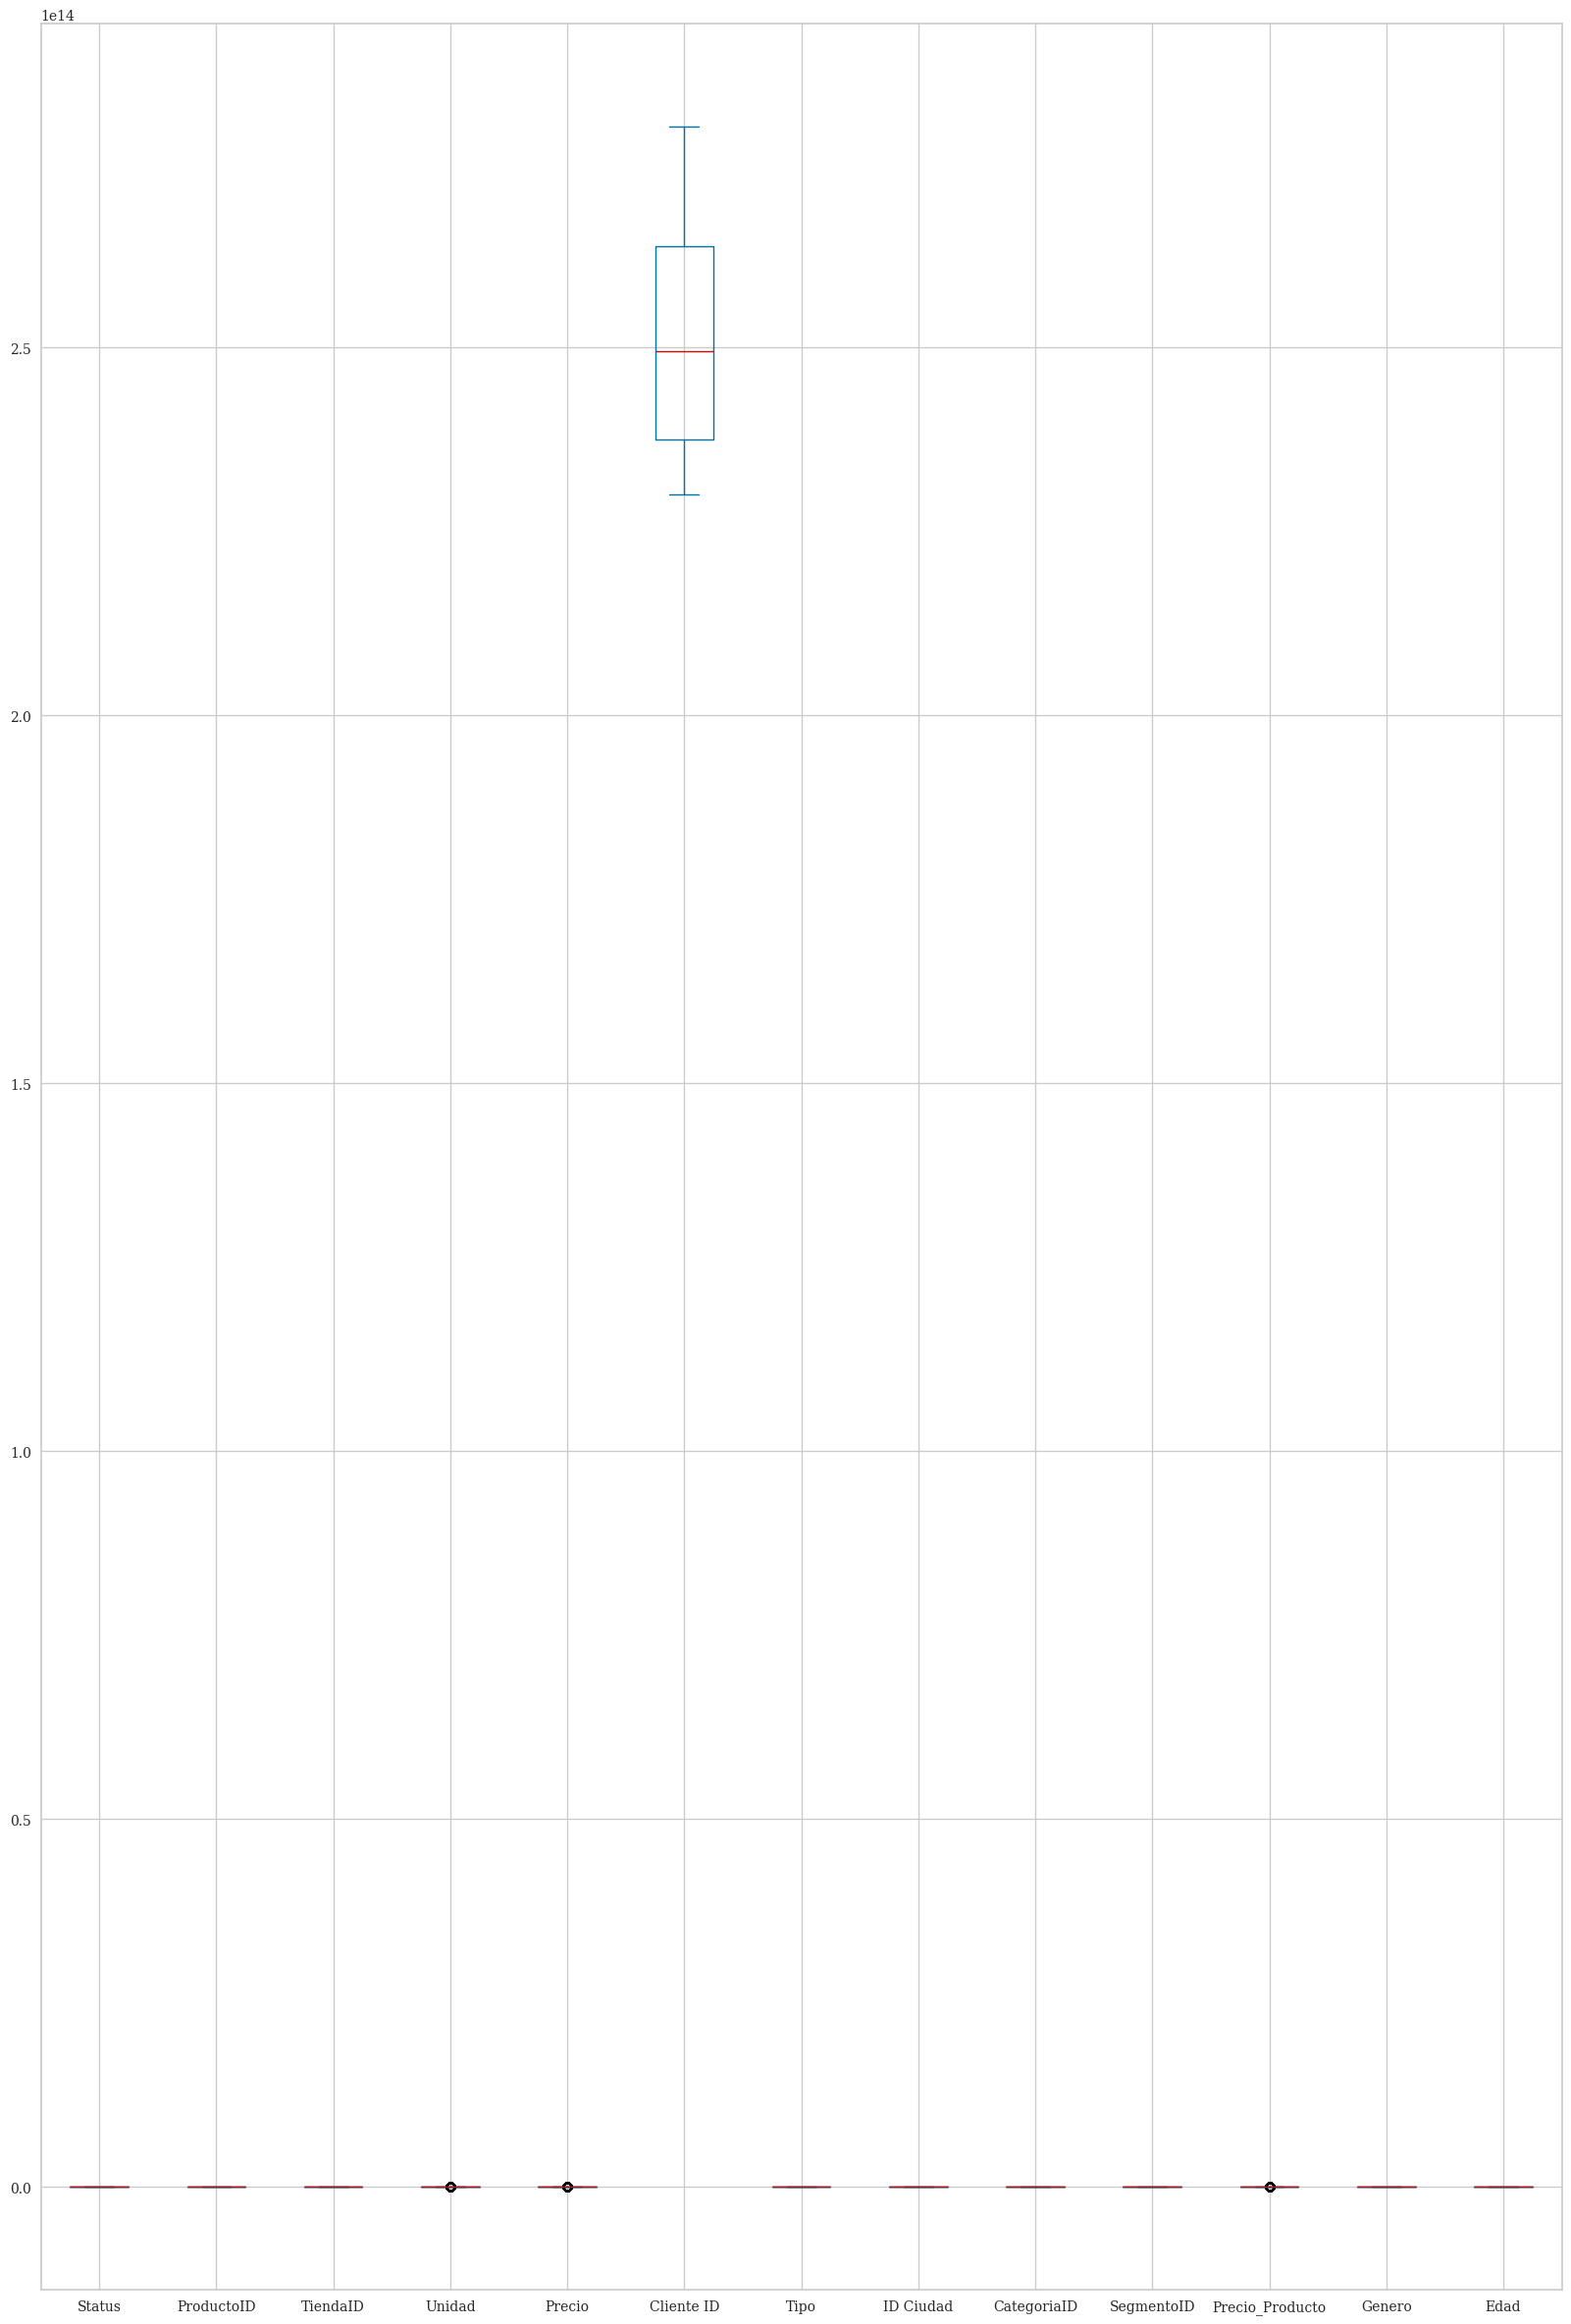

In [240]:
dfUnificado.plot.box(figsize=(20,30));

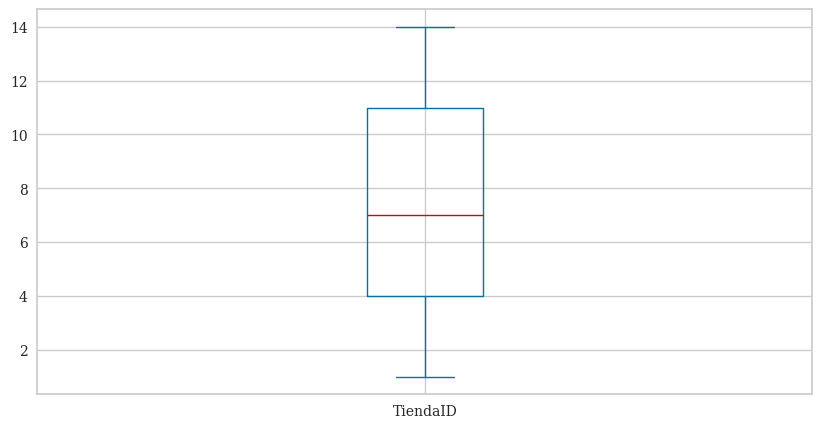

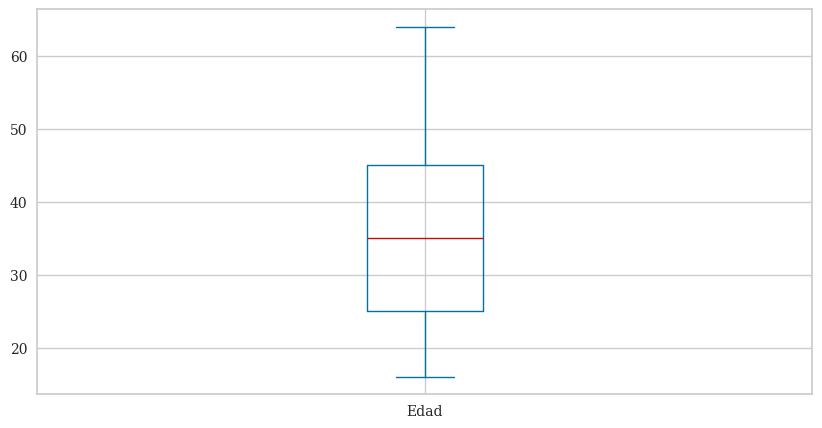

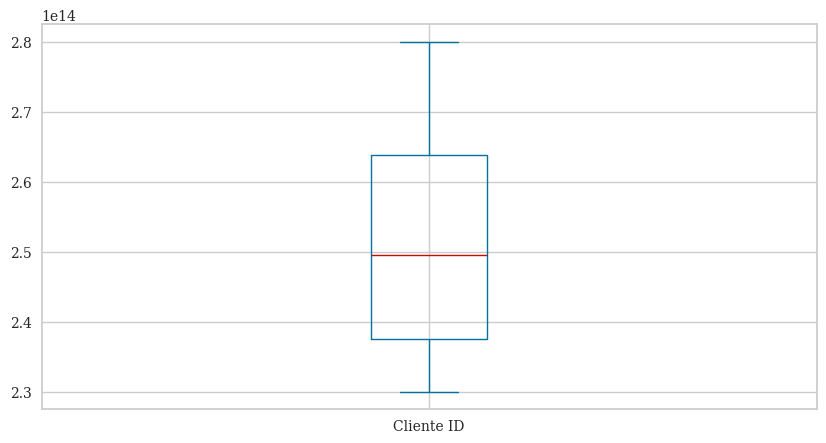

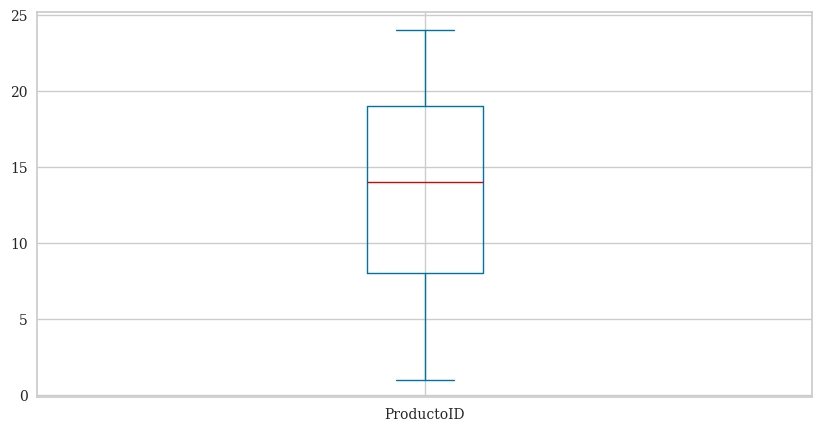

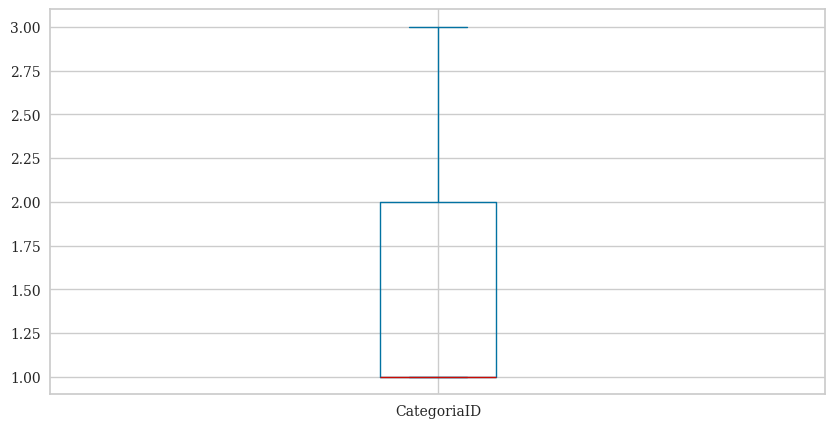

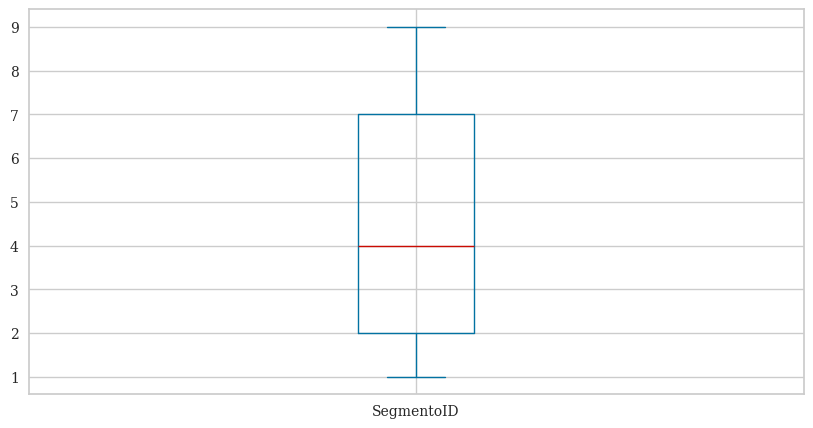

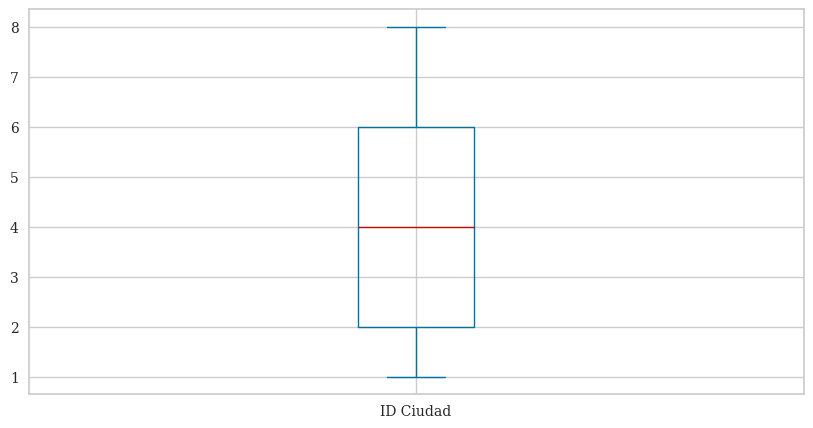

In [241]:
fig, ax = plt.subplots(figsize=(10,5))
dfUnificado['TiendaID'].plot.box(ax=ax)

fig, ax = plt.subplots(figsize=(10,5))
dfUnificado['Edad'].plot.box(ax=ax)

fig, ax = plt.subplots(figsize=(10,5))
dfUnificado.loc[:,['Cliente ID']].plot.box(ax=ax);

fig, ax = plt.subplots(figsize=(10,5))
dfUnificado.loc[:,['ProductoID']].plot.box(ax=ax);

fig, ax = plt.subplots(figsize=(10,5))
dfUnificado.loc[:,['CategoriaID']].plot.box(ax=ax);

fig, ax = plt.subplots(figsize=(10,5))
dfUnificado.loc[:,['SegmentoID']].plot.box(ax=ax);

fig, ax = plt.subplots(figsize=(10,5))
dfUnificado.loc[:,['ID Ciudad']].plot.box(ax=ax);

<Figure size 1000x600 with 0 Axes>

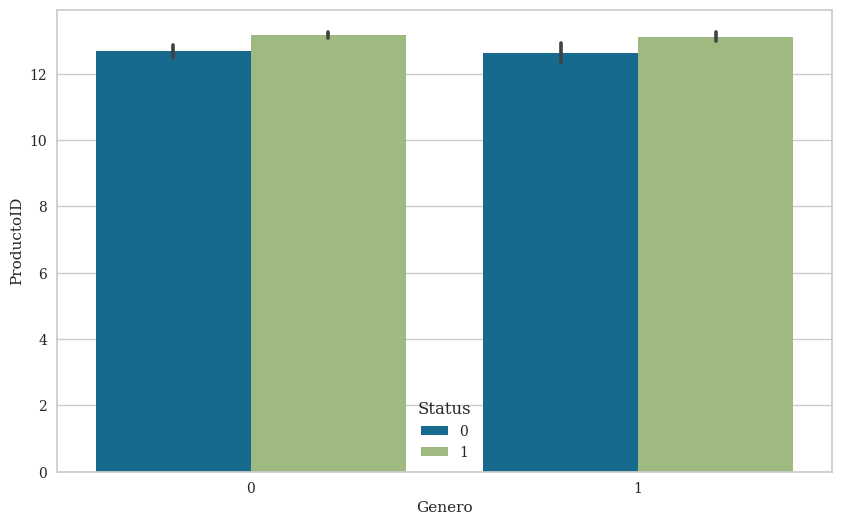

In [242]:
plt.figure(figsize=(10, 6))
grafic = sns.barplot(data=dfUnificado, x="Genero", y="ProductoID", hue="Status")

### Conversión variables categóricas en numéricas y preprocesamiento de la fecha

In [243]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dfUnificado['Año'] = dfUnificado['Fecha'].dt.year
dfUnificado['Mes'] = dfUnificado['Fecha'].dt.month
dfUnificado['Día'] = dfUnificado['Fecha'].dt.day
dfUnificado['DíaSemana'] = dfUnificado['Fecha'].dt.dayofweek

dfUnificado.drop(columns = 'Fecha', inplace=True)

categorical_columns = dfUnificado.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dfUnificado[col] = label_encoder.fit_transform(dfUnificado[col])

In [244]:
dfUnificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29875 entries, 0 to 29874
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Status           29875 non-null  int64  
 1   ProductoID       29875 non-null  float64
 2   TiendaID         29875 non-null  float64
 3   Unidad           29875 non-null  float64
 4   Precio           29875 non-null  float64
 5   Cliente ID       29875 non-null  float64
 6   Nombre           29875 non-null  int64  
 7   Tipo             29875 non-null  int64  
 8   ID Ciudad        29875 non-null  int64  
 9   CategoriaID      29875 non-null  int64  
 10  SegmentoID       29875 non-null  int64  
 11  Precio_Producto  29875 non-null  float64
 12  Genero           29875 non-null  int64  
 13  Edad             29875 non-null  int64  
 14  C.A.             29875 non-null  int64  
 15  Año              29875 non-null  int32  
 16  Mes              29875 non-null  int32  
 17  Día         

### Correlación de las features con la variable respuesta

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

<Axes: >

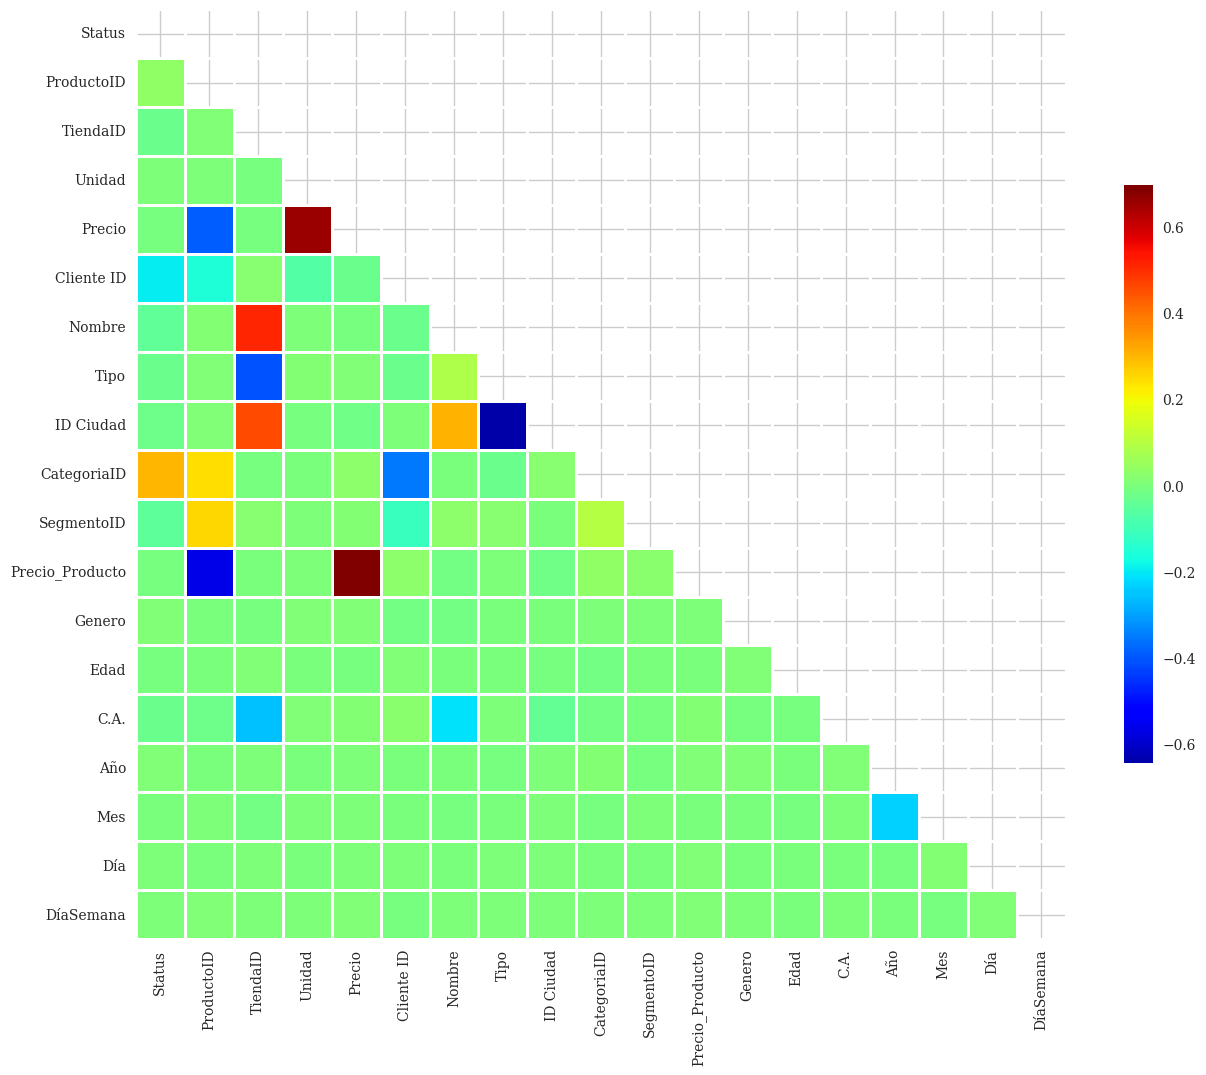

In [245]:
corr = dfUnificado.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});
plt.savefig('correlation_heatmap.png')

In [246]:
print("\nDataFrame Combinado:")
print(dfUnificado.head())


DataFrame Combinado:
   Status  ProductoID  TiendaID  Unidad  Precio    Cliente ID  Nombre  Tipo  \
0       1        12.0       5.0     1.0    40.0  2.300012e+14       4     0   
1       1        12.0       5.0     1.0    40.0  2.300040e+14       4     0   
2       1        12.0       5.0     1.0    40.0  2.300045e+14       4     0   
3       1        12.0       5.0     1.0    40.0  2.300053e+14       4     0   
4       1        12.0       5.0     1.0    40.0  2.300053e+14       4     0   

   ID Ciudad  CategoriaID  SegmentoID  Precio_Producto  Genero  Edad  C.A.  \
0          6            3           4             40.0       0    33     3   
1          6            3           4             40.0       0    37     3   
2          6            3           4             40.0       1    24     3   
3          6            3           4             40.0       1    40     3   
4          6            3           4             40.0       0    34     3   

    Año  Mes  Día  DíaSemana  
0  

## Preprocesamiento de datos

In [247]:
X_train, X_test = train_test_split(dfUnificado, test_size=0.3, random_state=42, stratify=dfUnificado['Status'])

y_train = dfUnificado.loc[X_train.index, 'Status']
y_test = dfUnificado.loc[X_test.index, 'Status']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20912, 19), (8963, 19), (20912,), (8963,))

In [248]:
dfUnificado['Status'].value_counts(normalize=True)

Status
1    0.730611
0    0.269389
Name: proportion, dtype: float64

In [249]:
y_train = X_train['Status']

print(y_train.value_counts(normalize=True))

X_train.drop('Status', axis=1, inplace = True)

Status
1    0.730633
0    0.269367
Name: proportion, dtype: float64


In [250]:
y_test = X_test['Status']

print(y_test.value_counts(normalize=True))

X_test.drop('Status', axis=1, inplace = True)

Status
1    0.730559
0    0.269441
Name: proportion, dtype: float64


In [251]:
ejemplos_train = dict(zip(list(y_train),[list(y_train).count(i) for i in list(y_train)]))
ejemplos_train


ejemplos_test = dict(zip(list(y_test),[list(y_test).count(i) for i in list(y_test)]))
ejemplos_test

{1: 15279, 0: 5633}

{0: 2415, 1: 6548}

In [252]:
clases = [str(v) for v in sorted(np.unique(y_train))]
clases

['0', '1']

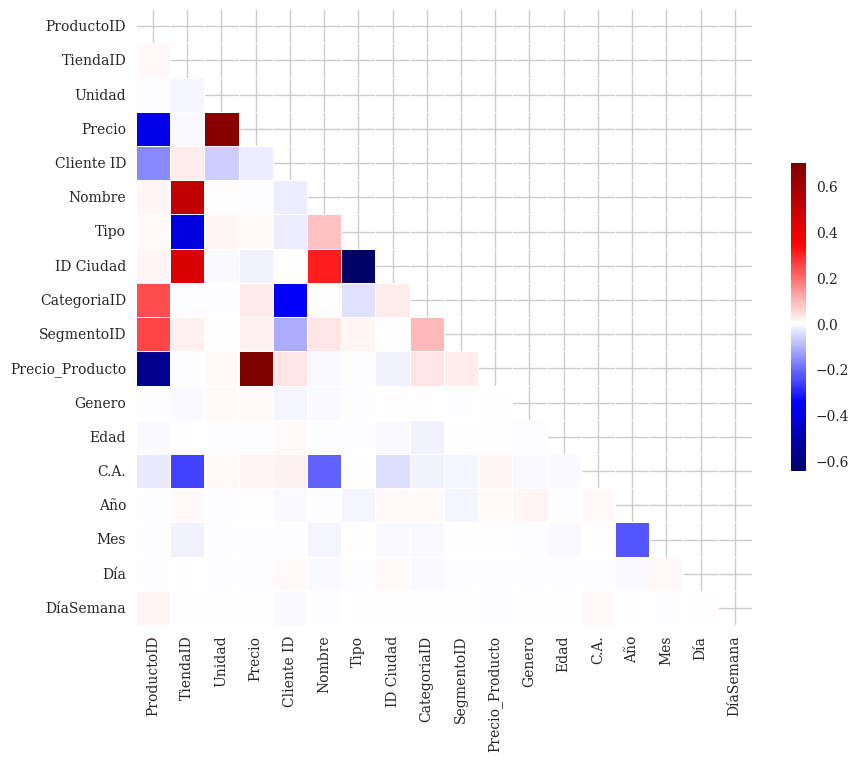

In [253]:
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

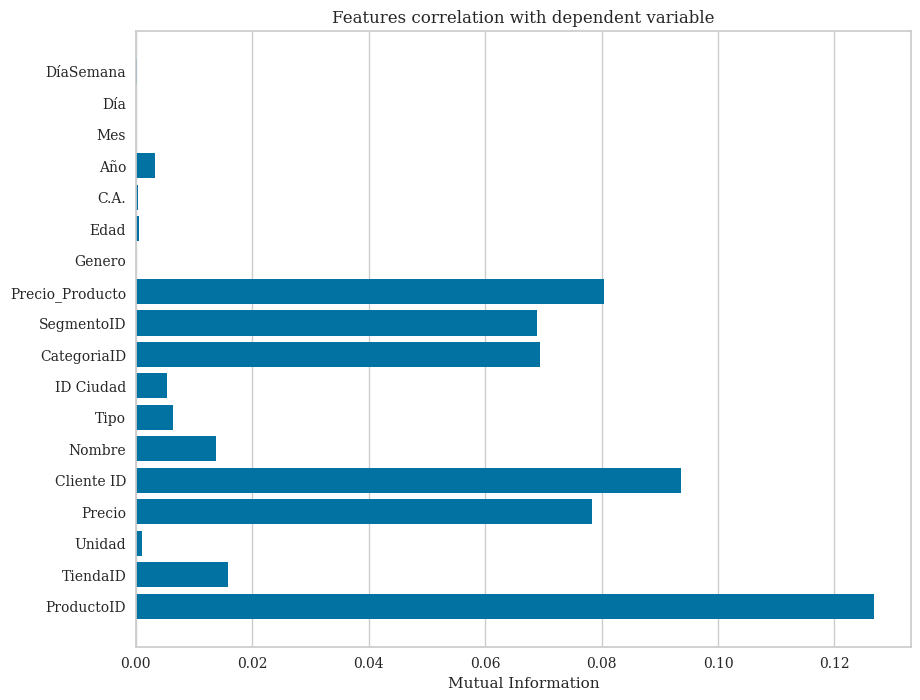

In [254]:
from yellowbrick.target.feature_correlation import feature_correlation

plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='mutual_info-classification');

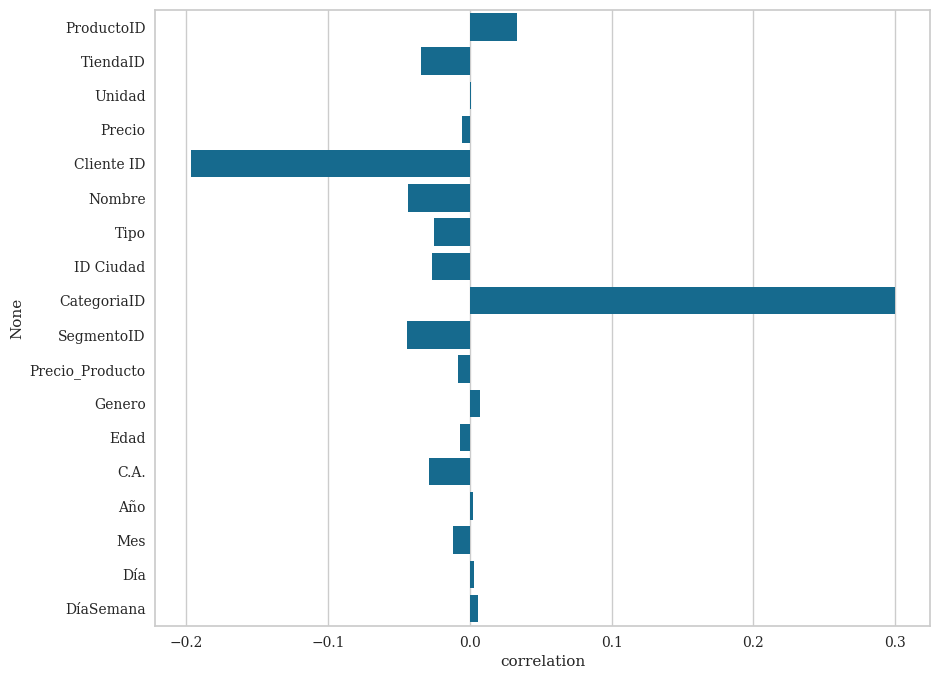

In [255]:
def feature_correlation(X, y, labels, method='pearson'):
    corr = X.corrwith(y, method=method)
    corr_df = pd.DataFrame(corr, columns=['correlation'])
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(x=corr_df['correlation'], y=corr_df.index, ax=ax, orient='h')
    ax.set_yticklabels(labels, rotation=0)
    return fig

visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns), method='pearson');

### Estandarización de los datos

In [256]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train_standarized = X_train.copy()
scaler = MinMaxScaler()
X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductoID,20912.0,0.522654,0.282773,0.0,0.304348,0.565217,0.782609,1.0
TiendaID,20912.0,0.478066,0.317169,0.0,0.230769,0.461538,0.769231,1.0
Unidad,20912.0,0.079811,0.242658,0.0,0.000000,0.000000,0.000000,1.0
Precio,20912.0,0.135700,0.135013,0.0,0.058394,0.091241,0.211679,1.0
Cliente ID,20912.0,0.424331,0.298559,0.0,0.149920,0.391590,0.677125,1.0
Nombre,20912.0,0.452121,0.299777,0.0,0.250000,0.416667,0.666667,1.0
Tipo,20912.0,0.712510,0.452603,0.0,0.000000,1.000000,1.000000,1.0
ID Ciudad,20912.0,0.426112,0.331724,0.0,0.142857,0.428571,0.714286,1.0
CategoriaID,20912.0,0.278357,0.418002,0.0,0.000000,0.000000,0.500000,1.0
SegmentoID,20912.0,0.439437,0.311404,0.0,0.125000,0.375000,0.750000,1.0


In [257]:
X_test_standarized = X_test.copy()
X_test_standarized[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductoID,8963.0,0.522486,0.281895,0.0,0.304348,0.565217,0.782609,1.0
TiendaID,8963.0,0.475682,0.317621,0.0,0.230769,0.461538,0.769231,1.0
Unidad,8963.0,0.082729,0.245901,0.0,0.000000,0.000000,0.000000,1.0
Precio,8963.0,0.137213,0.133940,0.0,0.058394,0.091241,0.218978,1.0
Cliente ID,8963.0,0.421576,0.297368,0.0,0.149432,0.391261,0.668963,1.0
Nombre,8963.0,0.447739,0.299212,0.0,0.250000,0.416667,0.666667,1.0
Tipo,8963.0,0.712262,0.452734,0.0,0.000000,1.000000,1.000000,1.0
ID Ciudad,8963.0,0.424316,0.331559,0.0,0.142857,0.428571,0.714286,1.0
CategoriaID,8963.0,0.284224,0.420437,0.0,0.000000,0.000000,0.500000,1.0
SegmentoID,8963.0,0.445317,0.311895,0.0,0.125000,0.375000,0.750000,1.0


### PCA

In [258]:
from sklearn.decomposition import PCA
myPCA = PCA().fit(X_train_standarized[X_train.columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[0.15930645 0.1140652  0.10992936 0.08173528 0.06904028 0.06574749
 0.05924077 0.05090784 0.04765273 0.04582236 0.04099427 0.03863294
 0.03350544 0.02966358 0.02523583 0.01491514 0.01294321 0.00066184]
[0.15930645 0.27337165 0.38330101 0.46503629 0.53407656 0.59982405
 0.65906482 0.70997267 0.7576254  0.80344776 0.84444203 0.88307497
 0.9165804  0.94624399 0.97147982 0.98639495 0.99933816 1.        ]


### Screeplot

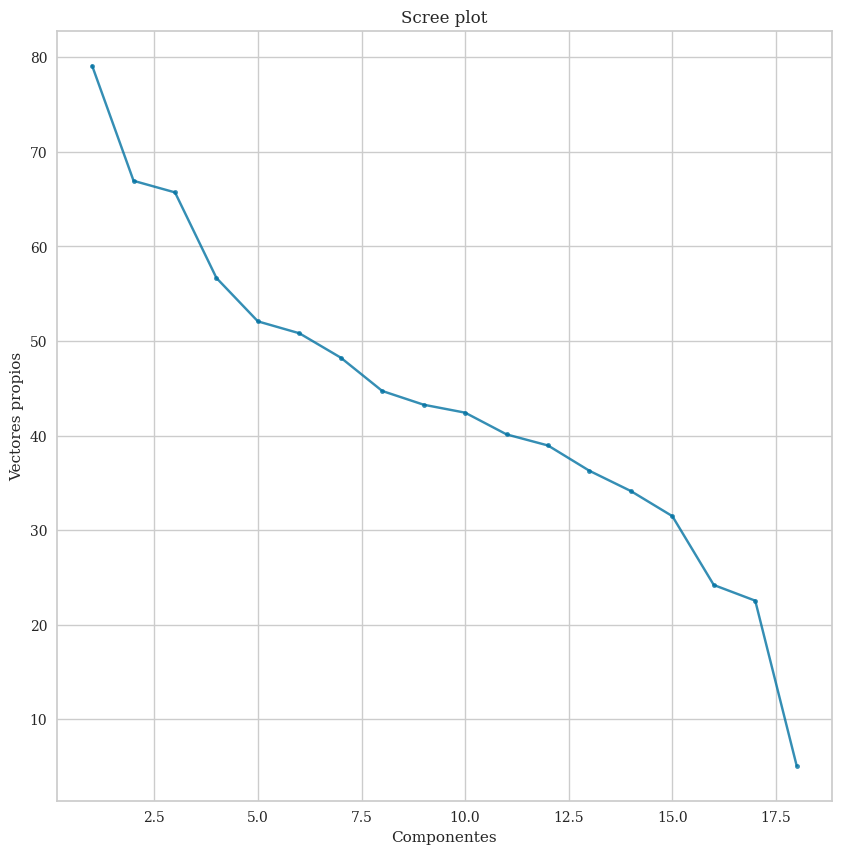

In [259]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

Text(0.5, 1.0, 'Porcentaje de variancia explicada por componente')

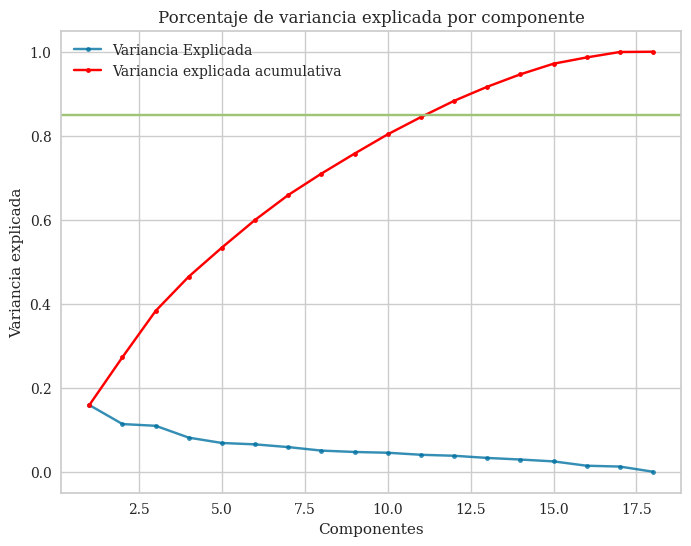

In [260]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');
plt.axhline(y=0.85, color='g', linestyle='-')

## Entrenamiento de los modelos

In [266]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 13.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 11.5 MB/s eta 0:00:0000:0100:01


In [268]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 4.1 MB/s eta 0:00:00


In [272]:
!pip install --upgrade numpy scipy pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable


RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

Random Forest - Accuracy: 0.927256498940087

Classification Report:
              precision    recall  f1-score   support

        Sold       0.94      0.78      0.85      2415
    Returned       0.92      0.98      0.95      6548

    accuracy                           0.93      8963
   macro avg       0.93      0.88      0.90      8963
weighted avg       0.93      0.93      0.92      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Random Forest - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

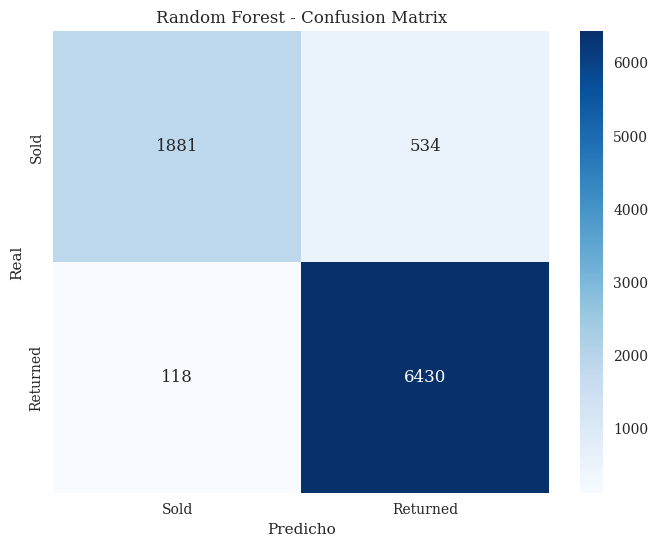

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'Random Forest - ROC Curve')

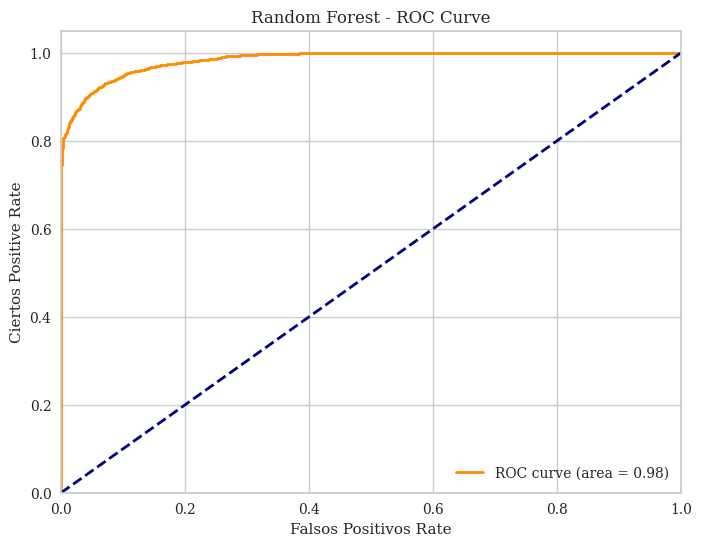

GradientBoostingClassifier(n_estimators=200, random_state=42)

Gradient Boosting - Accuracy: 0.9576034809773514

Classification Report:
              precision    recall  f1-score   support

        Sold       0.95      0.89      0.92      2415
    Returned       0.96      0.98      0.97      6548

    accuracy                           0.96      8963
   macro avg       0.96      0.93      0.94      8963
weighted avg       0.96      0.96      0.96      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Gradient Boosting - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

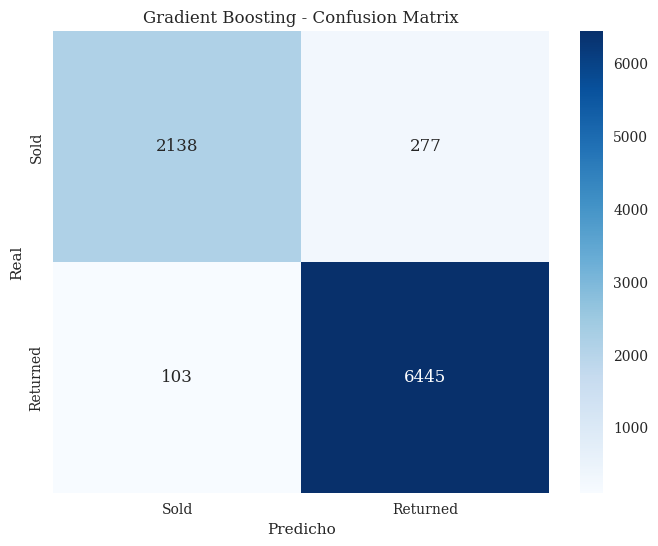

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'Gradient Boosting - ROC Curve')

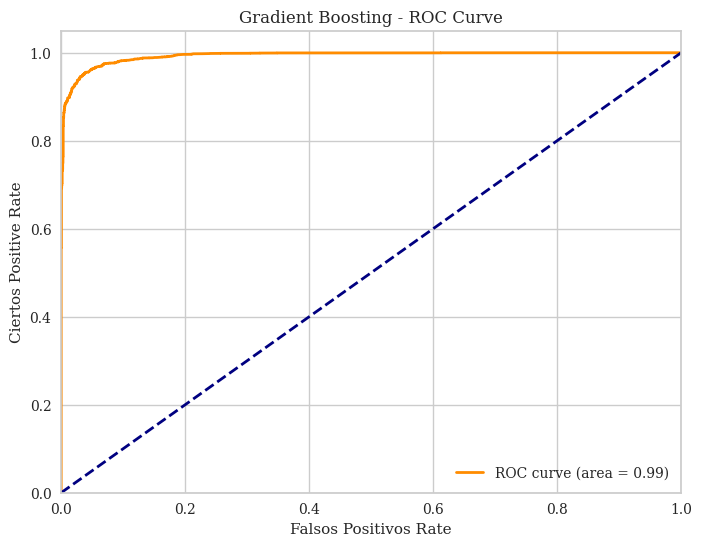

SVC(random_state=42)

Support Vector Machine - Accuracy: 0.7305589646323776

Classification Report:
              precision    recall  f1-score   support

        Sold       0.00      0.00      0.00      2415
    Returned       0.73      1.00      0.84      6548

    accuracy                           0.73      8963
   macro avg       0.37      0.50      0.42      8963
weighted avg       0.53      0.73      0.62      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Support Vector Machine - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

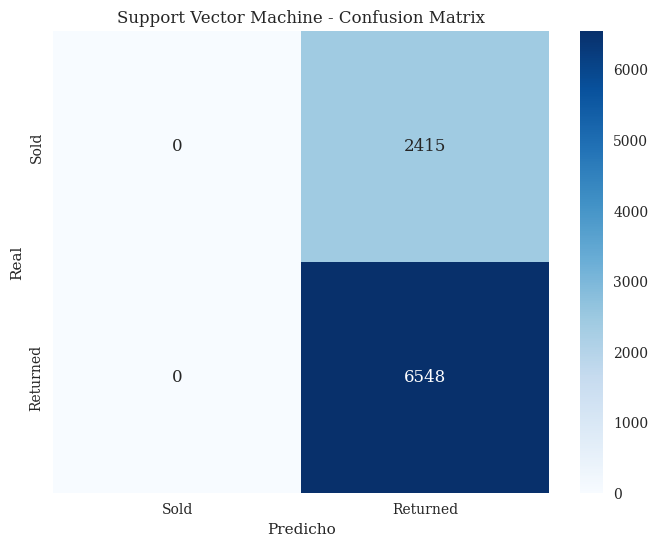

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

XGBoost - Accuracy: 0.9648555171259623

Classification Report:
              precision    recall  f1-score   support

        Sold       0.95      0.92      0.93      2415
    Returned       0.97      0.98      0.98      6548

    accuracy                           0.96      8963
   macro avg       0.96      0.95      0.95      8963
weighted avg       0.96      0.96      0.96      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'XGBoost - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

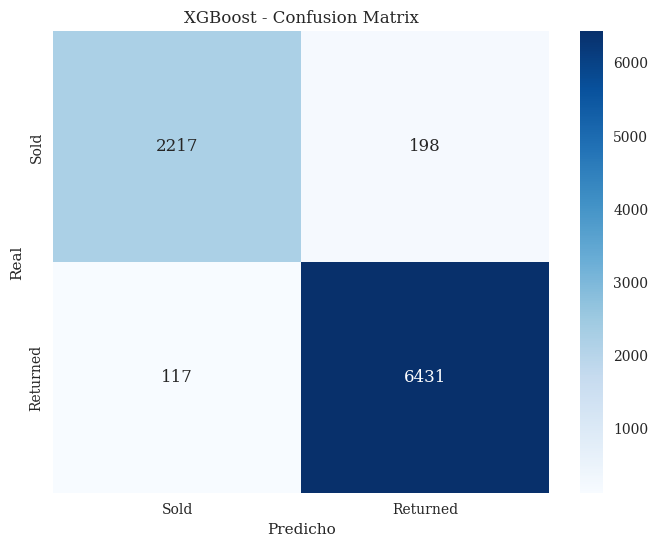

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'XGBoost - ROC Curve')

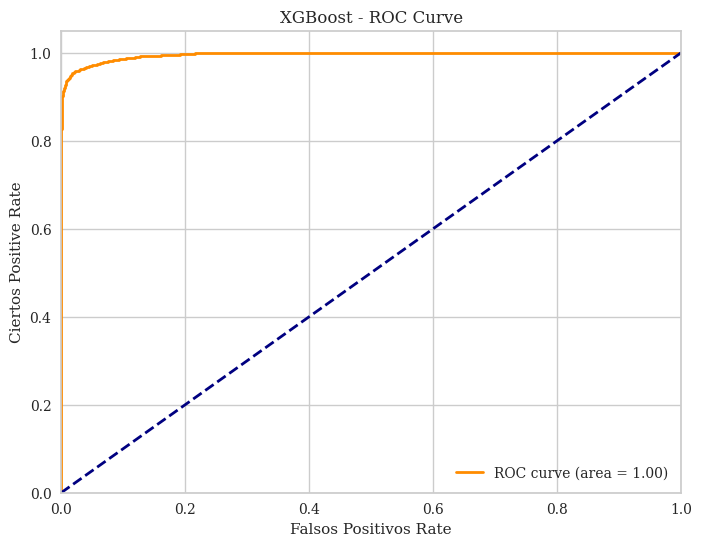

GaussianNB()

Gaussian Naive Bayes - Accuracy: 0.7335713488787237

Classification Report:
              precision    recall  f1-score   support

        Sold       0.55      0.06      0.12      2415
    Returned       0.74      0.98      0.84      6548

    accuracy                           0.73      8963
   macro avg       0.64      0.52      0.48      8963
weighted avg       0.69      0.73      0.65      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Gaussian Naive Bayes - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

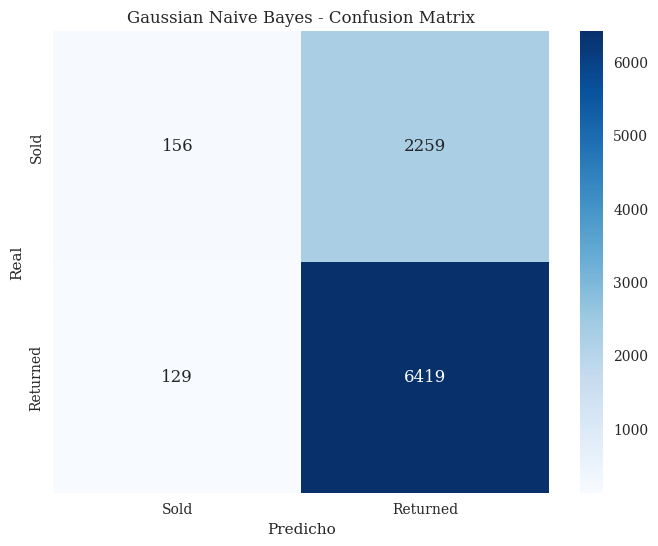

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'Gaussian Naive Bayes - ROC Curve')

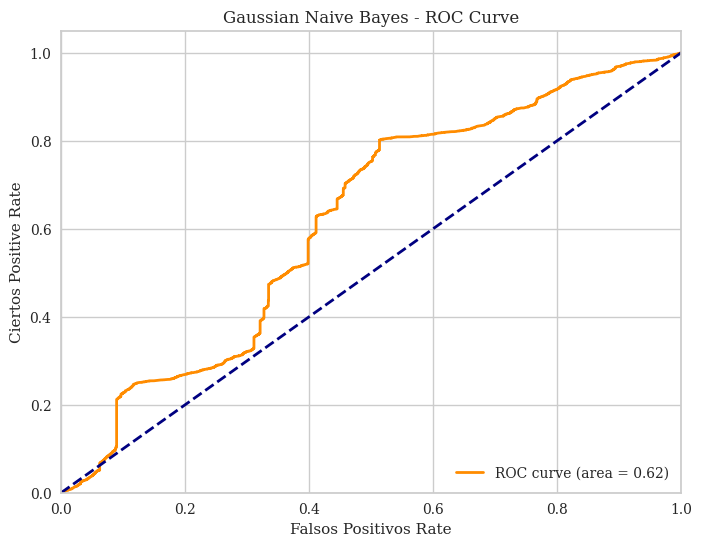

MultinomialNB()

Multinomial Naive Bayes - Accuracy: 0.6463237755215887

Classification Report:
              precision    recall  f1-score   support

        Sold       0.39      0.55      0.46      2415
    Returned       0.81      0.68      0.74      6548

    accuracy                           0.65      8963
   macro avg       0.60      0.62      0.60      8963
weighted avg       0.69      0.65      0.66      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Multinomial Naive Bayes - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

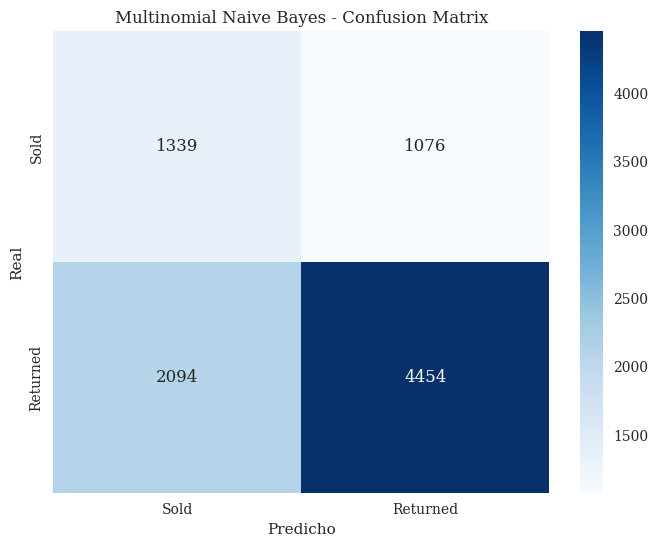

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'Multinomial Naive Bayes - ROC Curve')

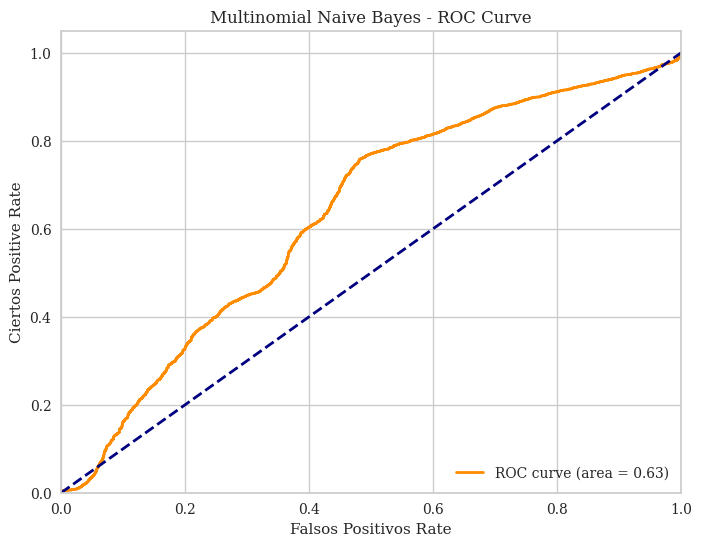

BernoulliNB()

Bernoulli Naive Bayes - Accuracy: 0.7305589646323776

Classification Report:
              precision    recall  f1-score   support

        Sold       0.00      0.00      0.00      2415
    Returned       0.73      1.00      0.84      6548

    accuracy                           0.73      8963
   macro avg       0.37      0.50      0.42      8963
weighted avg       0.53      0.73      0.62      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Bernoulli Naive Bayes - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

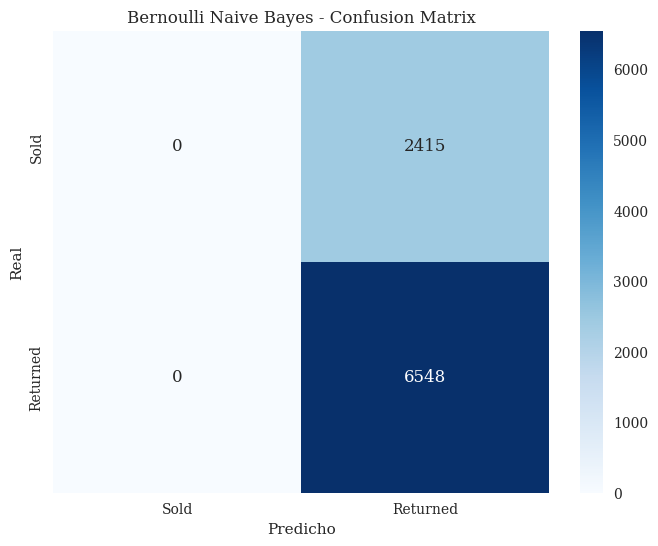

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'Bernoulli Naive Bayes - ROC Curve')

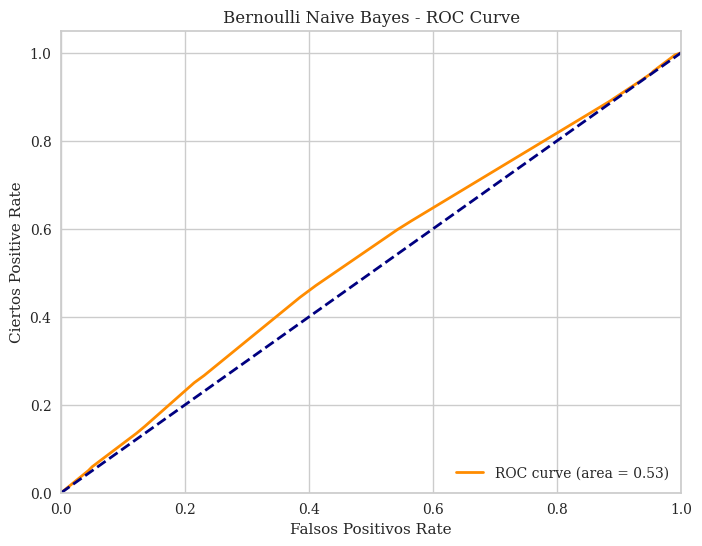

DecisionTreeClassifier(random_state=42)

Decision Tree - Accuracy: 0.9863884859979918

Classification Report:
              precision    recall  f1-score   support

        Sold       0.98      0.97      0.97      2415
    Returned       0.99      0.99      0.99      6548

    accuracy                           0.99      8963
   macro avg       0.98      0.98      0.98      8963
weighted avg       0.99      0.99      0.99      8963




<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Decision Tree - Confusion Matrix')

Text(70.72222222222221, 0.5, 'Real')

Text(0.5, 36.72222222222221, 'Predicho')

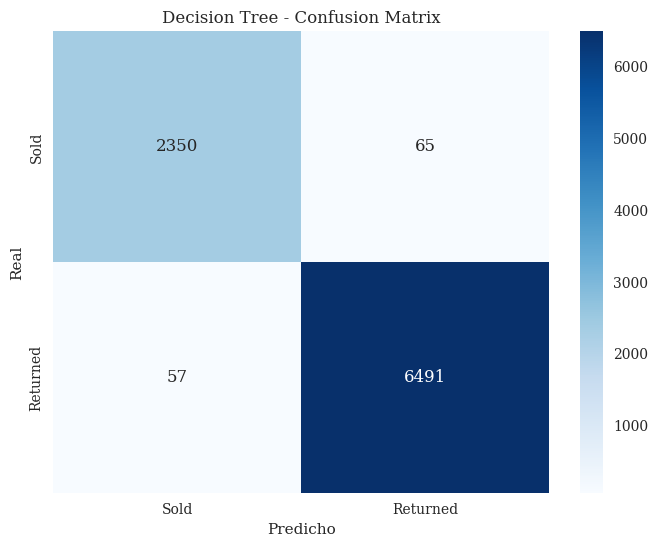

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Falsos Positivos Rate')

Text(0, 0.5, 'Ciertos Positive Rate')

Text(0.5, 1.0, 'Decision Tree - ROC Curve')

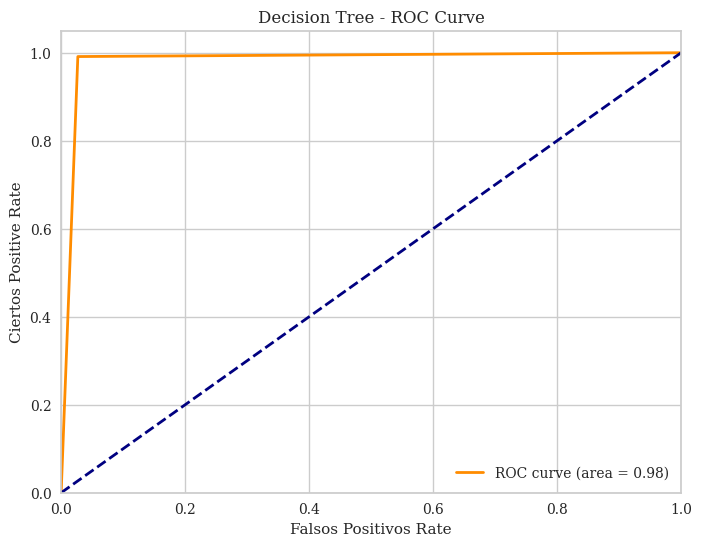

In [292]:
models = [
    ('Random Forest', RandomForestClassifier(
        n_estimators=1000, max_depth=10, min_samples_split=2, random_state=42)),
    
    ('Gradient Boosting', GradientBoostingClassifier(
        learning_rate=0.1, n_estimators=200, max_depth=3, random_state=42)),
    
    ('Support Vector Machine', SVC(
        C=1.0, kernel='rbf', gamma='scale', random_state=42)),
    
    ('XGBoost', XGBClassifier(
        learning_rate=0.01, n_estimators=300, max_depth=10, 
        subsample=0.8, colsample_bytree=0.8, random_state=42)),
    
    ('Gaussian Naive Bayes', GaussianNB(var_smoothing=1e-9)),
    
    ('Multinomial Naive Bayes', MultinomialNB(alpha=1.0)),
    
    ('Bernoulli Naive Bayes', BernoulliNB(alpha=1.0, binarize=0.0)),
    
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Sold', 'Returned'])
    
    print(f'{name} - Accuracy: {accuracy}\n')
    print(f'Classification Report:\n{report}\n')
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sold', 'Returned'], yticklabels=['Sold', 'Returned'])
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()
    
    if hasattr(model, "predict_proba"):
        from sklearn.metrics import roc_curve, auc
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Falsos Positivos Rate')
        plt.ylabel('Ciertos Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()